
 [다중 선형회귀 결과 요약]
                            OLS Regression Results                            
Dep. Variable:            defect_rate   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1.917
Date:                Mon, 03 Nov 2025   Prob (F-statistic):              0.140
Time:                        12:01:57   Log-Likelihood:                 211.17
No. Observations:                  29   AIC:                            -412.3
Df Residuals:                      24   BIC:                            -405.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const       

/tmp/ipykernel_128/781727790.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='Blues_r')


 - multiple_linear_summary.txt (회귀 요약)
 - multiple_linear_coefficients.png (계수 시각화)
 - multiple_linear_pred_vs_actual.png (예측-실측 비교 그래프)


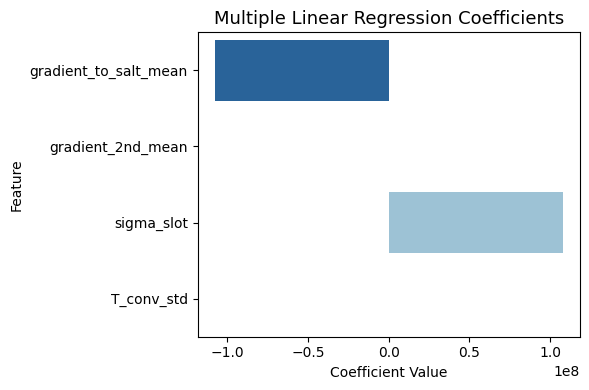

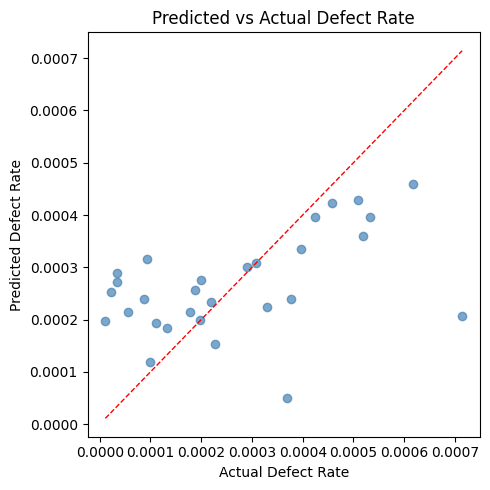

In [12]:
# ==================== 다중 선형회귀 분석 코드 ====================
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- 1. 데이터 로드 --------------------
df = pd.read_csv("./processed_regression_data.csv")  # 전처리 완료된 데이터 불러오기
target = 'defect_rate'  # 불량률을 예측 목표로 설정

# -------------------- 2. 주요 피처 선택 --------------------
features = ['gradient_to_salt_mean', 'gradient_2nd_mean', 'sigma_slot','T_conv_std' ]

X = df[features]
y = df[target]

# 상수항 추가 (절편용)
X = sm.add_constant(X)

# -------------------- 3. 모델 학습 --------------------
model = sm.OLS(y, X).fit()

# -------------------- 4. 결과 요약 출력 --------------------
print("\n [다중 선형회귀 결과 요약]")
print(model.summary())

# -------------------- 5. 회귀계수 시각화 --------------------
coef_df = model.params.reset_index()
coef_df.columns = ['Feature', 'Coefficient']
coef_df = coef_df[coef_df['Feature'] != 'const']

plt.figure(figsize=(6, 4))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='Blues_r')
plt.title("Multiple Linear Regression Coefficients", fontsize=13)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("multiple_linear_coefficients.png", dpi=150)
#plt.show()

# -------------------- 6. 예측 vs 실제 비교 --------------------
y_pred = model.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred, alpha=0.7, color='steelblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=1)
plt.xlabel("Actual Defect Rate")
plt.ylabel("Predicted Defect Rate")
plt.title("Predicted vs Actual Defect Rate")
plt.tight_layout()
plt.savefig("multiple_linear_pred_vs_actual.png", dpi=150)
#plt.show()

# -------------------- 7. 결과 저장 --------------------
summary_text = model.summary().as_text()
with open("multiple_linear_summary.txt", "w", encoding="utf-8") as f:
    f.write(summary_text)
print(" - multiple_linear_summary.txt (회귀 요약)")
print(" - multiple_linear_coefficients.png (계수 시각화)")
print(" - multiple_linear_pred_vs_actual.png (예측-실측 비교 그래프)")


In [2]:
pip install pandas numpy Scipy matplotlib seaborn

  Using cached pandas-2.3.3-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.3.4-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.16.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp311-cp311-manylinux_2_2

In [4]:
pip install statsmodels

  Using cached statsmodels-0.14.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
Using cached statsmodels-0.14.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.5 MB)
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.
